In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from scTools import input, preprocess
#import cello
import os
import anndata as ad
from anndata import AnnData

In [19]:
#Load files
subsample = None
onMac=True

whichTreatment = 4

treatment = ['NonfatVehicle', 'FriedVehicle', 'FriedCRV431', 'FriedLANIFI', 'FriedCRVLAN']
if onMac:
    pathPrefix='clusteringResults/'
else:
    pathPrefix = '/media/pmayo/Disc4/scRNA-seq_Gallay2020/alignments/'

for item in [treatment[0]]:
    adata = sc.read_h5ad(pathPrefix+treatment[whichTreatment]+'.h5ad')
    adata.uns['log1p']["base"] = None

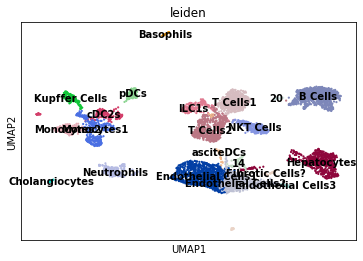

In [20]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')
#sc.pl.umap(adata, legend_loc='on data', save='_blank_FriedmanVehicle')
#sc.pl.umap(adata, color=['leiden'], legend_loc=None, title='', save='_color_FriedmanVehicle')

In [4]:
LymphoidCells = ['B Cells', 'pDCs', 'NK Cells', 'NKT Cells', 
                 'T Cells', 'T Cells1', 'T Cell2', 'T Cells3', 'y-delta T Cells',
                'ILC1s']
MyeloidCells = ['cDC1s', 'cDC2s', 'Mig. cDCs', 'Kupffer Cells', 'Monocytes',
               'Monocytes1', 'Monocytes2', 'Monocytes3', 'Monocytes4', 
               'Macrophage/Monocyte', 'Macrophages']
CD45s = ['Cholangiocytes', 'Hepatocytes', 'Stellate Cells', 'Fibroblasts',
        'Endothelial Cells', 'Endothelial/Fibrotic Cells']
print(np.unique(adata.obs['leiden']))

['B Cells' 'Basophils' 'Cancer' 'Cholangiocytes'
 'Endothelial/Fibrotic Cells' 'ILC1s' 'Macrophage/Monocyte' 'Mig. cDCs'
 'Monocytes1' 'Monocytes3' 'Monocytes4' 'NKT Cells' 'Neutrophils' 'Plasma'
 'T Cell2' 'T Cells' 'cDC1s' 'cDC2s' 'pDCs' 'y-delta T Cells']


In [5]:
adata.obs['Lymph'] = [True if x in LymphoidCells else False for x in adata.obs['leiden']]
adata.obs['Myeloid'] = [True if x in MyeloidCells else False for x in adata.obs['leiden']]
adata.obs['CD45'] = [True if x in CD45s else False for x in adata.obs['leiden']]

lymphAdata = adata[adata.obs['Lymph']==True]
myeloidAdata = adata[adata.obs['Myeloid']==True]
CD45Adata = adata[adata.obs['CD45']==True]


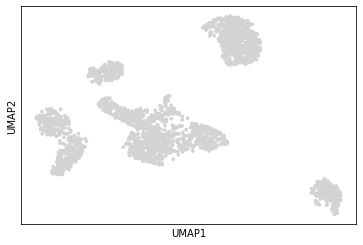

In [6]:

#sc.pp.neighbors(lymphAdata, n_neighbors=15, n_pcs=40)
#sc.tl.umap(lymphAdata)
preprocess.umapify(lymphAdata)

#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

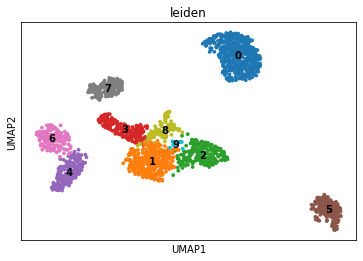

In [7]:
sc.tl.leiden(lymphAdata, resolution=0.6)
sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')
sc.tl.rank_genes_groups(lymphAdata, 'leiden', method='logreg', max_iter=2000)


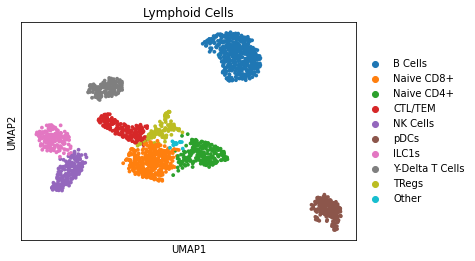

In [11]:
#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

#leiden = lymphAdata.obs['leiden'].map({x:('Other' if x=='9' else x) for x in lymphAdata.obs['leiden']})
#lymphAdata.obs['leiden'] = leiden
sc.pl.umap(lymphAdata, color=['leiden'], title='Lymphoid Cells',save='_lymph')


Cluster B Cells


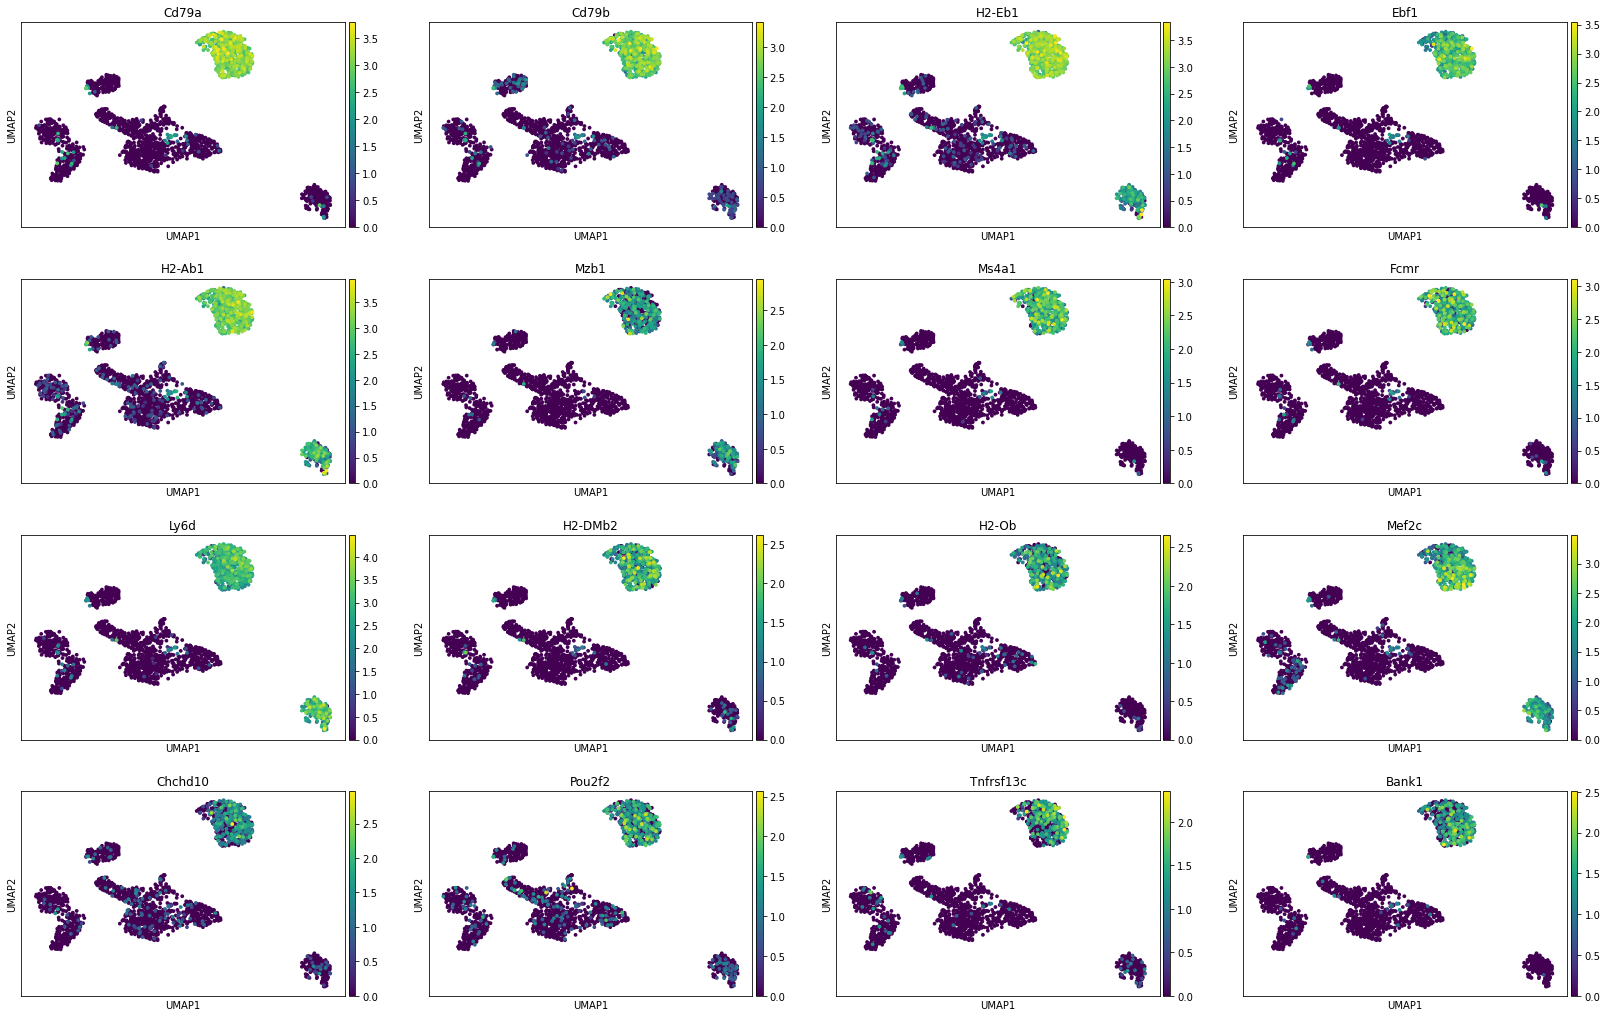

Cluster CTL/TEM


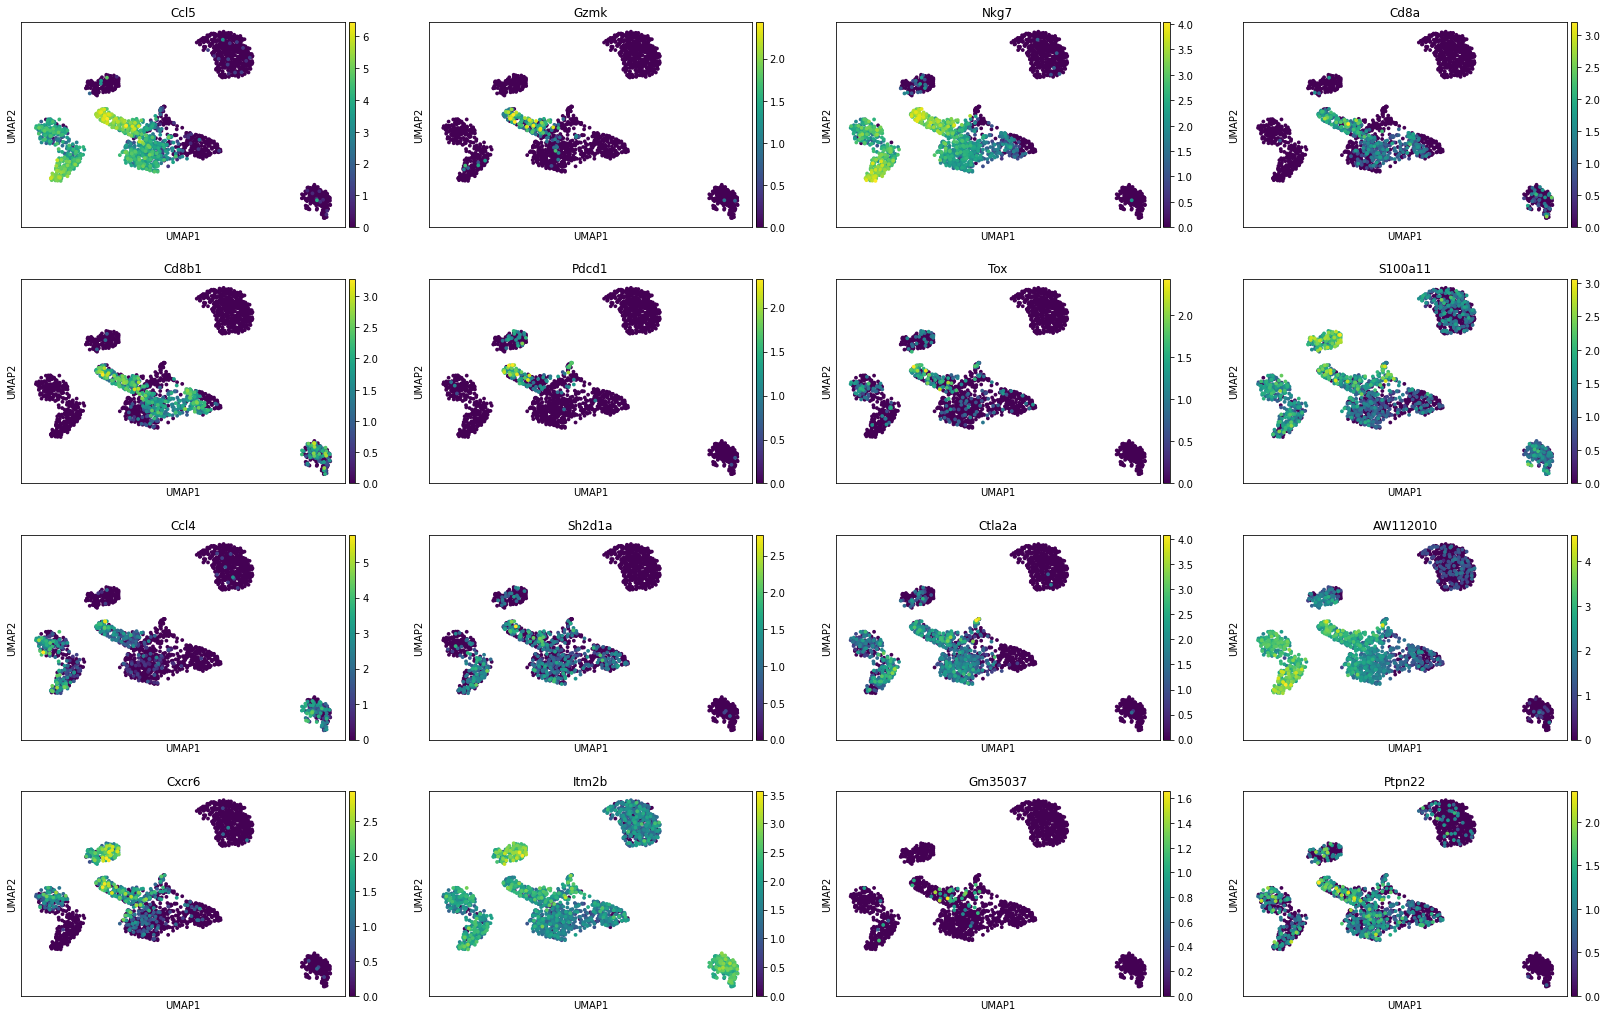

Cluster ILC1s


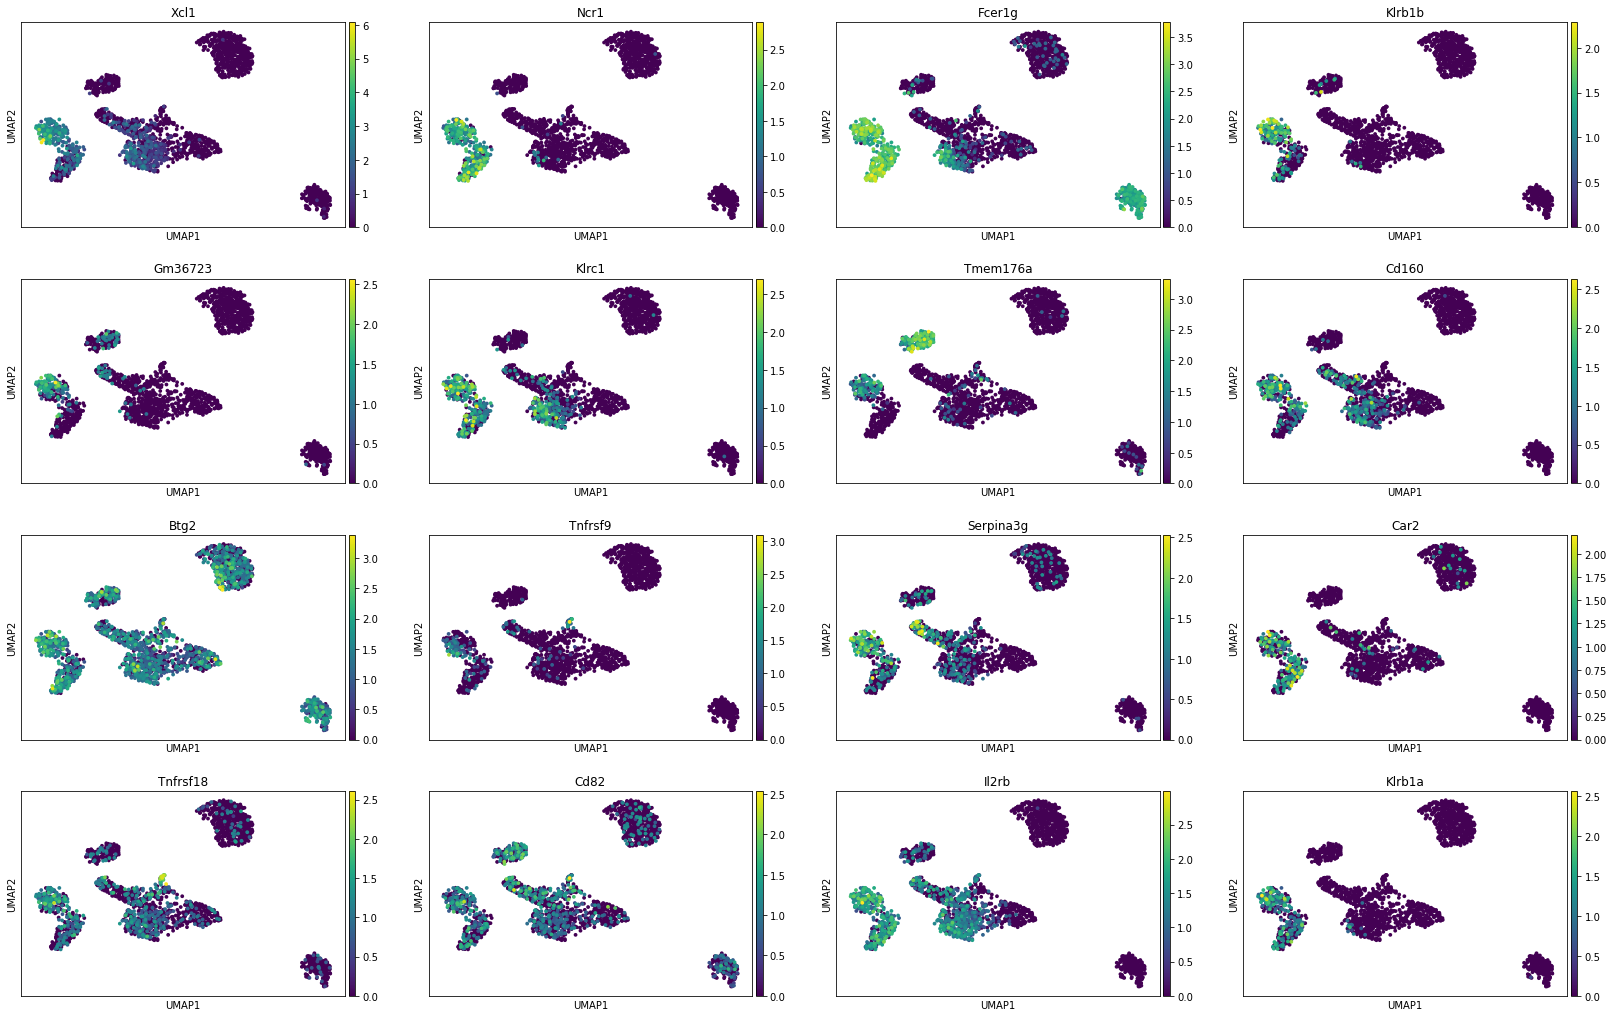

Cluster NK Cells


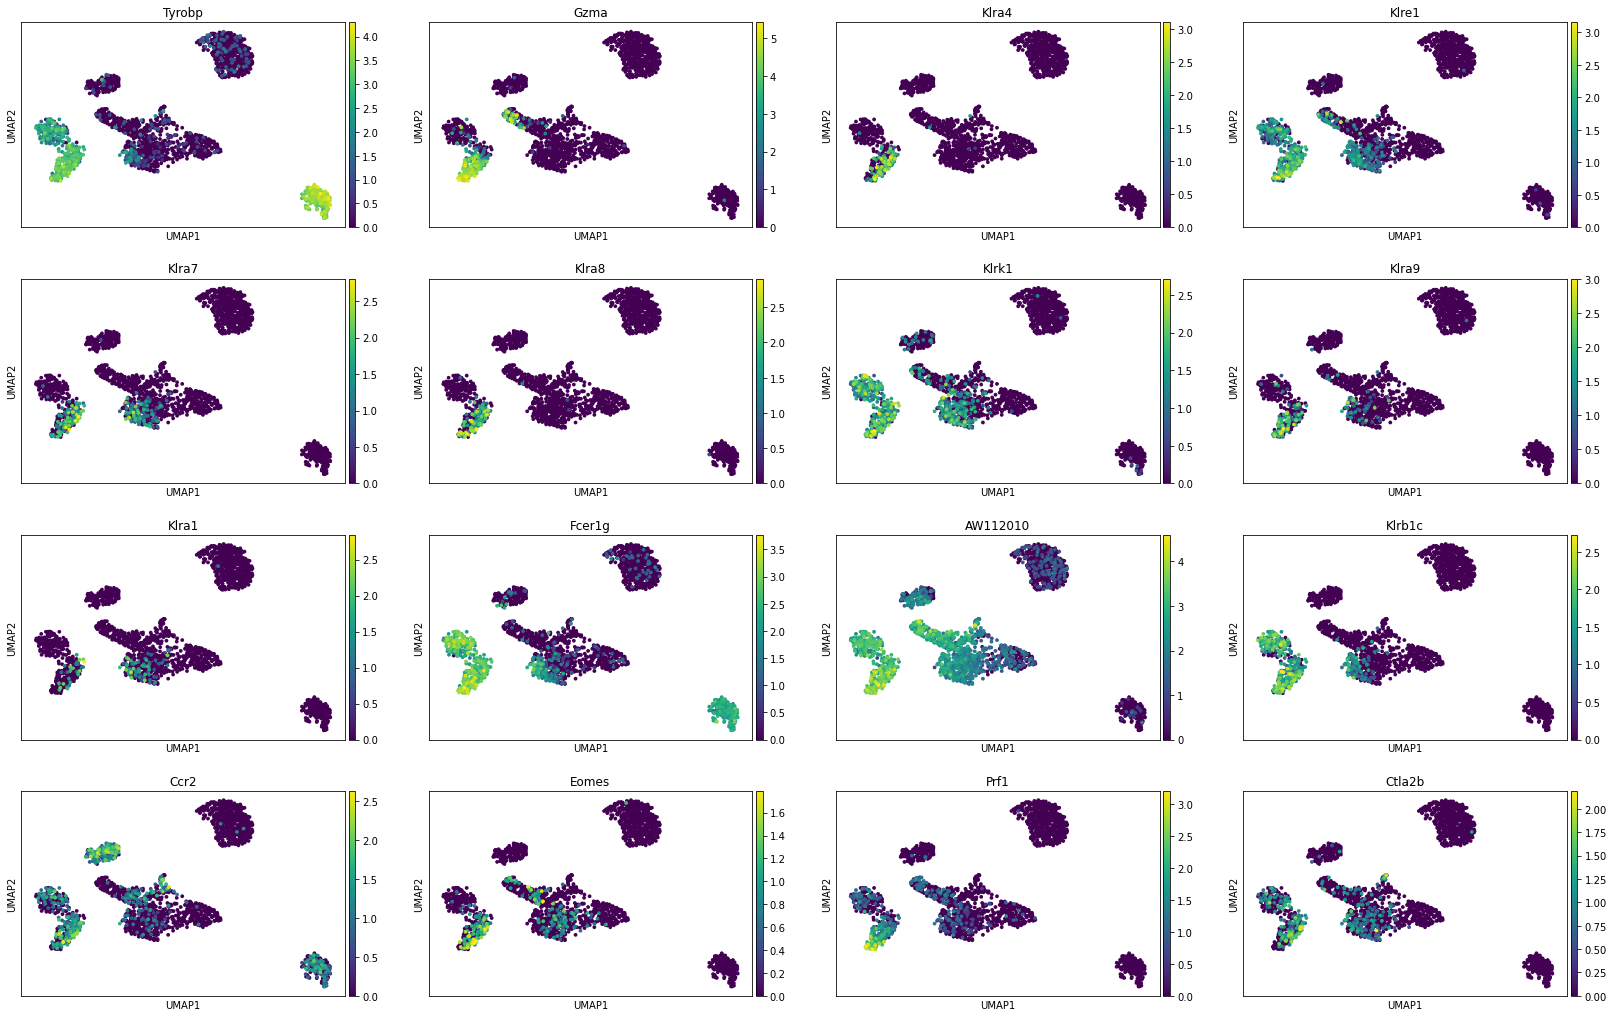

Cluster Naive CD4+


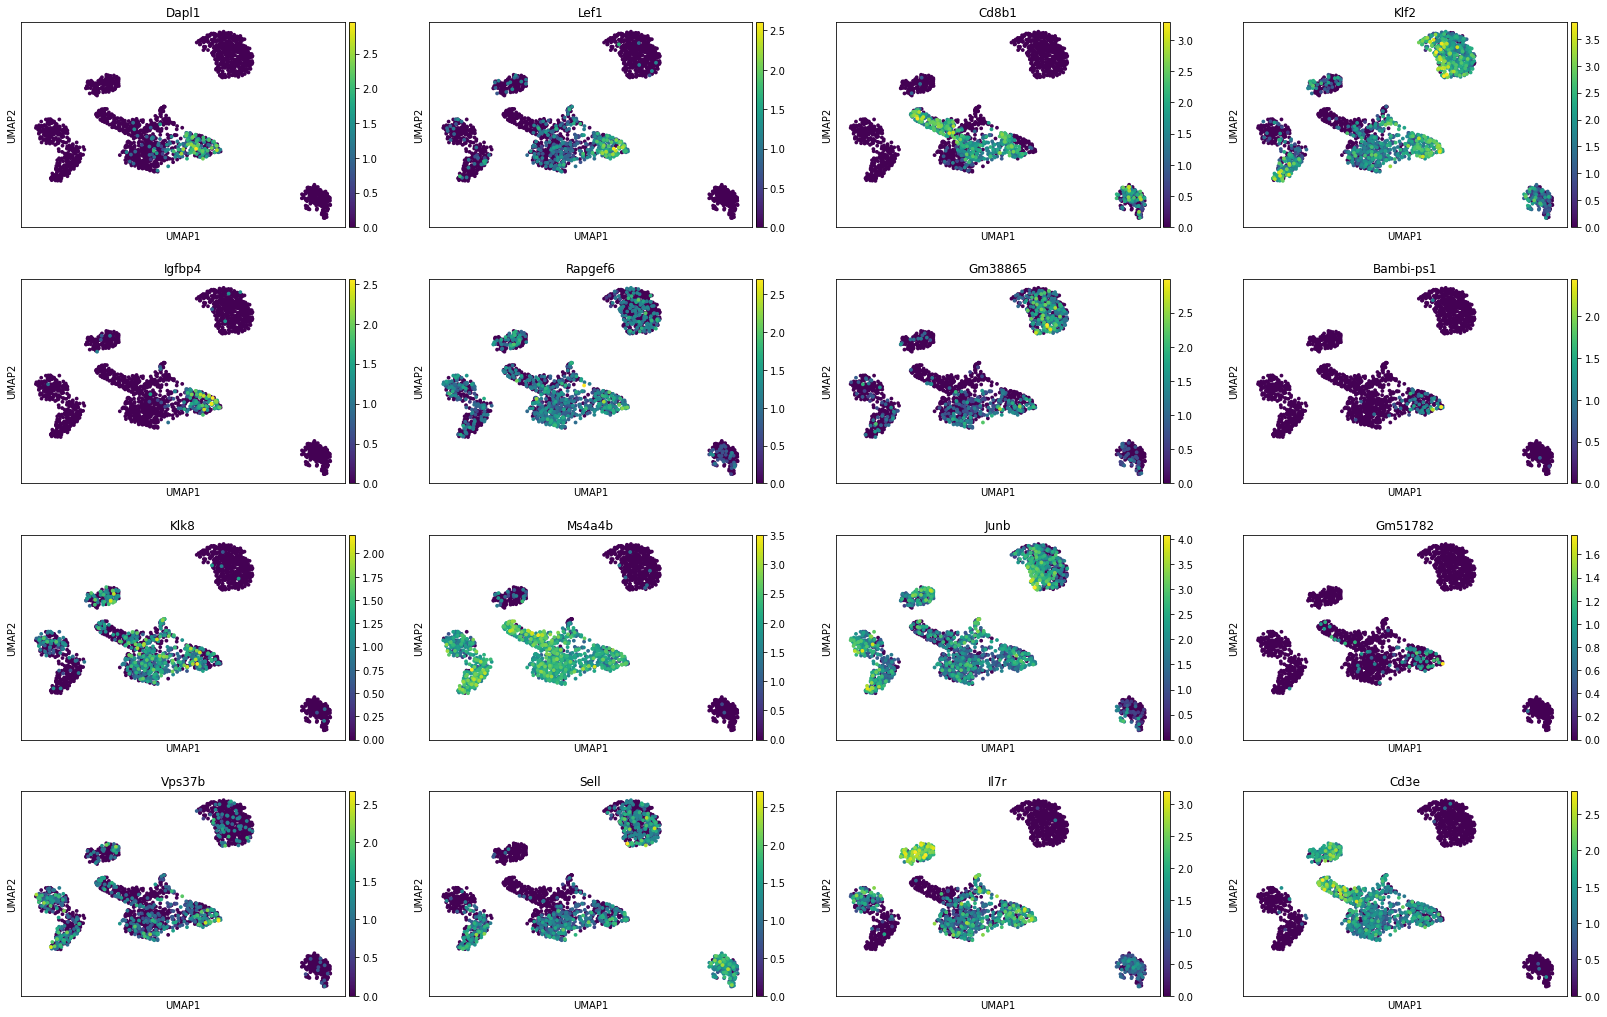

Cluster Naive CD8+


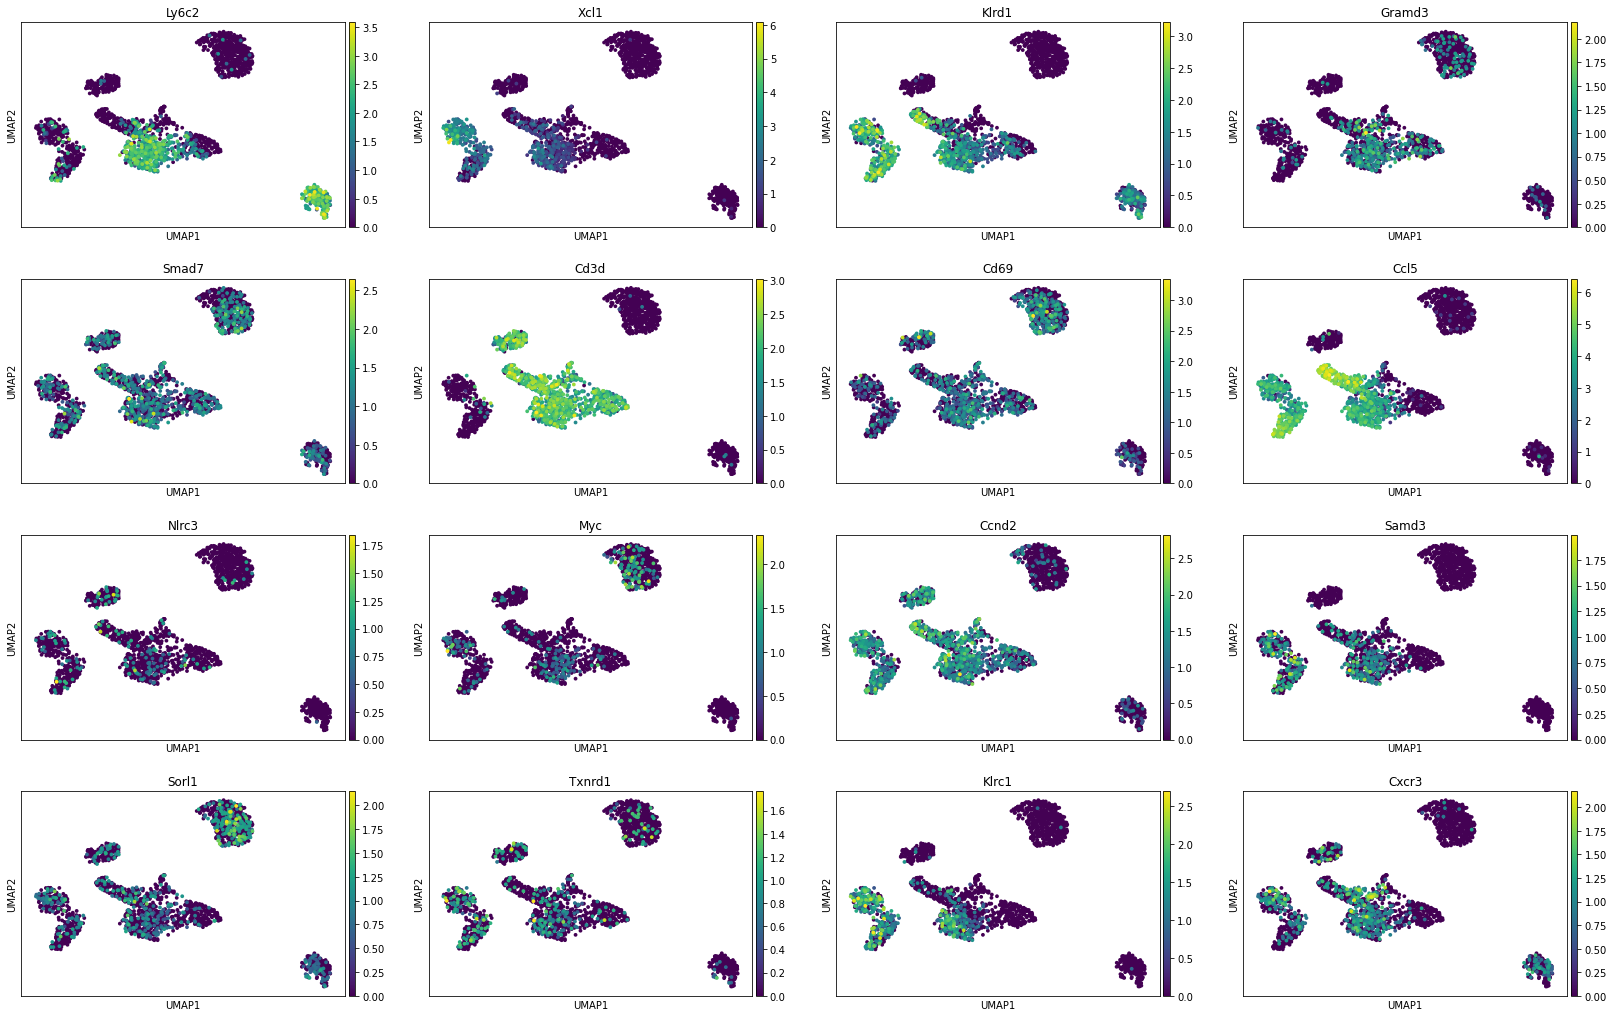

Cluster Other


ValueError: no field of name Other

In [10]:
for cluster in np.unique(lymphAdata.obs['leiden']):
    print(f"Cluster {cluster}")
    sc.pl.umap(lymphAdata, color=lymphAdata.uns['rank_genes_groups']['names'][str(cluster)][:16])

newClusterNames = ['B Cells','Naive CD8+','Naive CD4+','CTL/TEM','NK Cells','pDCs',
                   'ILC1s','Y-Delta T Cells', 'T-Regs','Other']
lymphAdata.rename_categories('leiden', newClusterNames)
